## Introduction

This project addresses inequality of educational opportunity in U.S. high schools. Here we will focus on average student performance on the ACT or SAT exams that students take as part of the college application process.

We expect a range of school performance on these exams, but is school performance predicted by socioeconomic factors?

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as itt
sns.set_theme(style='whitegrid')
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Load clean data

##### $\rightarrow$ Load the clean data set from Github.

In [ ]:
X_train = pd.read_csv("https://raw.githubusercontent.com/SlimNaka/Education_Inequality/Pre-grade/X_train.csv", dtype={"id": "str", "zip_code": "str"})
X_test = pd.read_csv("https://raw.githubusercontent.com/SlimNaka/Education_Inequality/Pre-grade/X_test.csv", dtype={"id": "str", "zip_code": "str"})

##### $\rightarrow$ Review the contents of the data set.

In [ ]:
X_train.head()

,id,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,percent_multiling,state,zip_code,school_type,school_level,average_act
0,340630005814,-0.736595,-0.146047,1.060706,0.380549,-1.344151,0.242158,NJ,07840,Regular School,High,21.788767
1,120051000837,0.159068,0.878605,0.416147,0.557313,0.805964,-0.588981,FL,32526,Regular School,High,19.224664
2,360008705188,1.281535,-0.611498,-1.996803,-1.019957,1.982434,2.407552,NY,10463,Regular School,High,18.125763
3,170000305119,-0.534578,0.158568,0.178641,-0.008887,-0.513926,-0.804493,IL,61842,Regular School,High,21.300000
4,341176000652,-0.781743,1.775518,1.488997,3.355178,-1.737117,0.490273,NJ,07675,Regular School,High,24.865690


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5680 non-null   object 
 1   rate_unemployment  5680 non-null   float64
 2   percent_college    5680 non-null   float64
 3   percent_married    5680 non-null   float64
 4   median_income      5680 non-null   float64
 5   percent_lunch      5680 non-null   float64
 6   percent_multiling  5680 non-null   float64
 7   state              5680 non-null   object 
 8   zip_code           5680 non-null   object 
 9   school_type        5680 non-null   object 
 10  school_level       5680 non-null   object 
 11  average_act        5680 non-null   float64
dtypes: float64(7), object(5)
memory usage: 532.6+ KB


In [ ]:
X_test.head()

,id,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,percent_multiling,state,zip_code,school_type,school_level,average_act
0,421092004373,-0.929938,1.311039,0.501210,-0.034786,-0.622316,-0.664248,PA,15601,Regular School,High,21.568987
1,340924004300,-0.845131,1.194987,0.143165,0.574062,-1.524448,0.275665,NJ,07940,Regular School,High,24.304029
2,390449001829,0.160447,0.596051,0.183738,-0.530354,0.701308,-0.430007,OH,43615,Regular School,High,17.000000
3,481533001102,-0.072572,0.417749,-0.785851,-0.537952,0.638075,0.321233,TX,75110,Regular School,High,19.371184
4,370009000028,0.304190,-0.816688,-0.350461,-0.715655,-0.221353,-0.732468,NC,28681,Regular School,High,20.958486


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1420 non-null   object 
 1   rate_unemployment  1420 non-null   float64
 2   percent_college    1420 non-null   float64
 3   percent_married    1420 non-null   float64
 4   median_income      1420 non-null   float64
 5   percent_lunch      1420 non-null   float64
 6   percent_multiling  1420 non-null   float64
 7   state              1420 non-null   object 
 8   zip_code           1420 non-null   object 
 9   school_type        1420 non-null   object 
 10  school_level       1420 non-null   object 
 11  average_act        1420 non-null   float64
dtypes: float64(7), object(5)
memory usage: 133.2+ KB


Let's remove unneeded feature columns: "id", "state", ."school_level", and "school_type". "id" means nothing to us at this point, we will use zip_code for geography, every school here is a high school, and lastly, there are so few school_types that differ from "regular".

In [ ]:
features = ["rate_unemployment",	"percent_college",	"percent_married",	"median_income",	"percent_lunch",	"percent_multiling",	"zip_code", "average_act"]
X_train = X_train[features]
X_test = X_test[features]

## State your questions

The overall problem is to determine whether and how average school ACT performance is related to socioeconomic factors. To answer this general problem, you will need to ask specific questions about the data.


##### $\rightarrow$ List your questions about the data that will help you solve the problem.

* What features (in combination and separately) seem to have the most correlation to academic performance?
* How much correlation exists between academic performacne and multilingualism specifically?
* Are there particular US regions that perform better (or worse) academically?

## Analysis

Perform analyses necessary to answer the questions. You will likely start by trying many things, some of which are useful and some of which are not. Don't be afraid to try different analyses at first. You will edit your notebook to a clean version that retains only the essential components at the end of the project.

This file should clearly produce the graphs, tables, models, etc that appear in the communication assignment.

##### To do a reggression on zip codes, we will only focus on the first digit which signifies a specific region to the US.

In [ ]:
zip_train = X_train["zip_code"]
zip_test = X_test["zip_code"]

In [ ]:
new_zip = []
for i in zip_train:
  if i[0][0] == "0":
    new_zip.append(0)
  elif i[0][0] == "1":
    new_zip.append(1)
  elif i[0][0] == "2":
   new_zip.append(2)
  elif i[0][0] == "3":
    new_zip.append(3)
  elif i[0][0] == "4":
    new_zip.append(4)
  elif i[0][0] == "5":
    new_zip.append(5)
  elif i[0][0] == "6":
    new_zip.append(6)
  elif i[0][0] == "7":
    new_zip.append(7)
  elif i[0][0] == "8":
    new_zip.append(8)
  elif i[0][0] == "9":
    new_zip.append(9)
  else: pass


In [ ]:
X_train["zip_code"] = new_zip

In [ ]:
new_zip = []
for i in zip_test:
  if i[0][0] == "0":
    new_zip.append(0)
  elif i[0][0] == "1":
    new_zip.append(1)
  elif i[0][0] == "2":
   new_zip.append(2)
  elif i[0][0] == "3":
    new_zip.append(3)
  elif i[0][0] == "4":
    new_zip.append(4)
  elif i[0][0] == "5":
    new_zip.append(5)
  elif i[0][0] == "6":
    new_zip.append(6)
  elif i[0][0] == "7":
    new_zip.append(7)
  elif i[0][0] == "8":
    new_zip.append(8)
  elif i[0][0] == "9":
    new_zip.append(9)
  else: pass

In [ ]:
X_test["zip_code"] = new_zip

In [ ]:
X_train.head()

,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,percent_multiling,zip_code,average_act
0,-0.736595,-0.146047,1.060706,0.380549,-1.344151,0.242158,0,21.788767
1,0.159068,0.878605,0.416147,0.557313,0.805964,-0.588981,3,19.224664
2,1.281535,-0.611498,-1.996803,-1.019957,1.982434,2.407552,1,18.125763
3,-0.534578,0.158568,0.178641,-0.008887,-0.513926,-0.804493,6,21.300000
4,-0.781743,1.775518,1.488997,3.355178,-1.737117,0.490273,0,24.865690


In [ ]:
X_test.head()

,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,percent_multiling,zip_code,average_act
0,-0.929938,1.311039,0.501210,-0.034786,-0.622316,-0.664248,1,21.568987
1,-0.845131,1.194987,0.143165,0.574062,-1.524448,0.275665,0,24.304029
2,0.160447,0.596051,0.183738,-0.530354,0.701308,-0.430007,4,17.000000
3,-0.072572,0.417749,-0.785851,-0.537952,0.638075,0.321233,7,19.371184
4,0.304190,-0.816688,-0.350461,-0.715655,-0.221353,-0.732468,2,20.958486


##### We will need to normalize these single-digit zip codes to fit in with our other data (recall that the normalization is with respect to the training set only).

In [ ]:
zip_mean = X_train["zip_code"].mean()
zip_std = X_train["zip_code"].std()

X_train["zip_code"] = (X_train["zip_code"] - zip_mean)/zip_std
X_test["zip_code"] = (X_test["zip_code"] - zip_mean)/zip_std

##### Let's take a look at how our selected features relate to average ACT scores.

<Figure size 1000x1000 with 0 Axes>

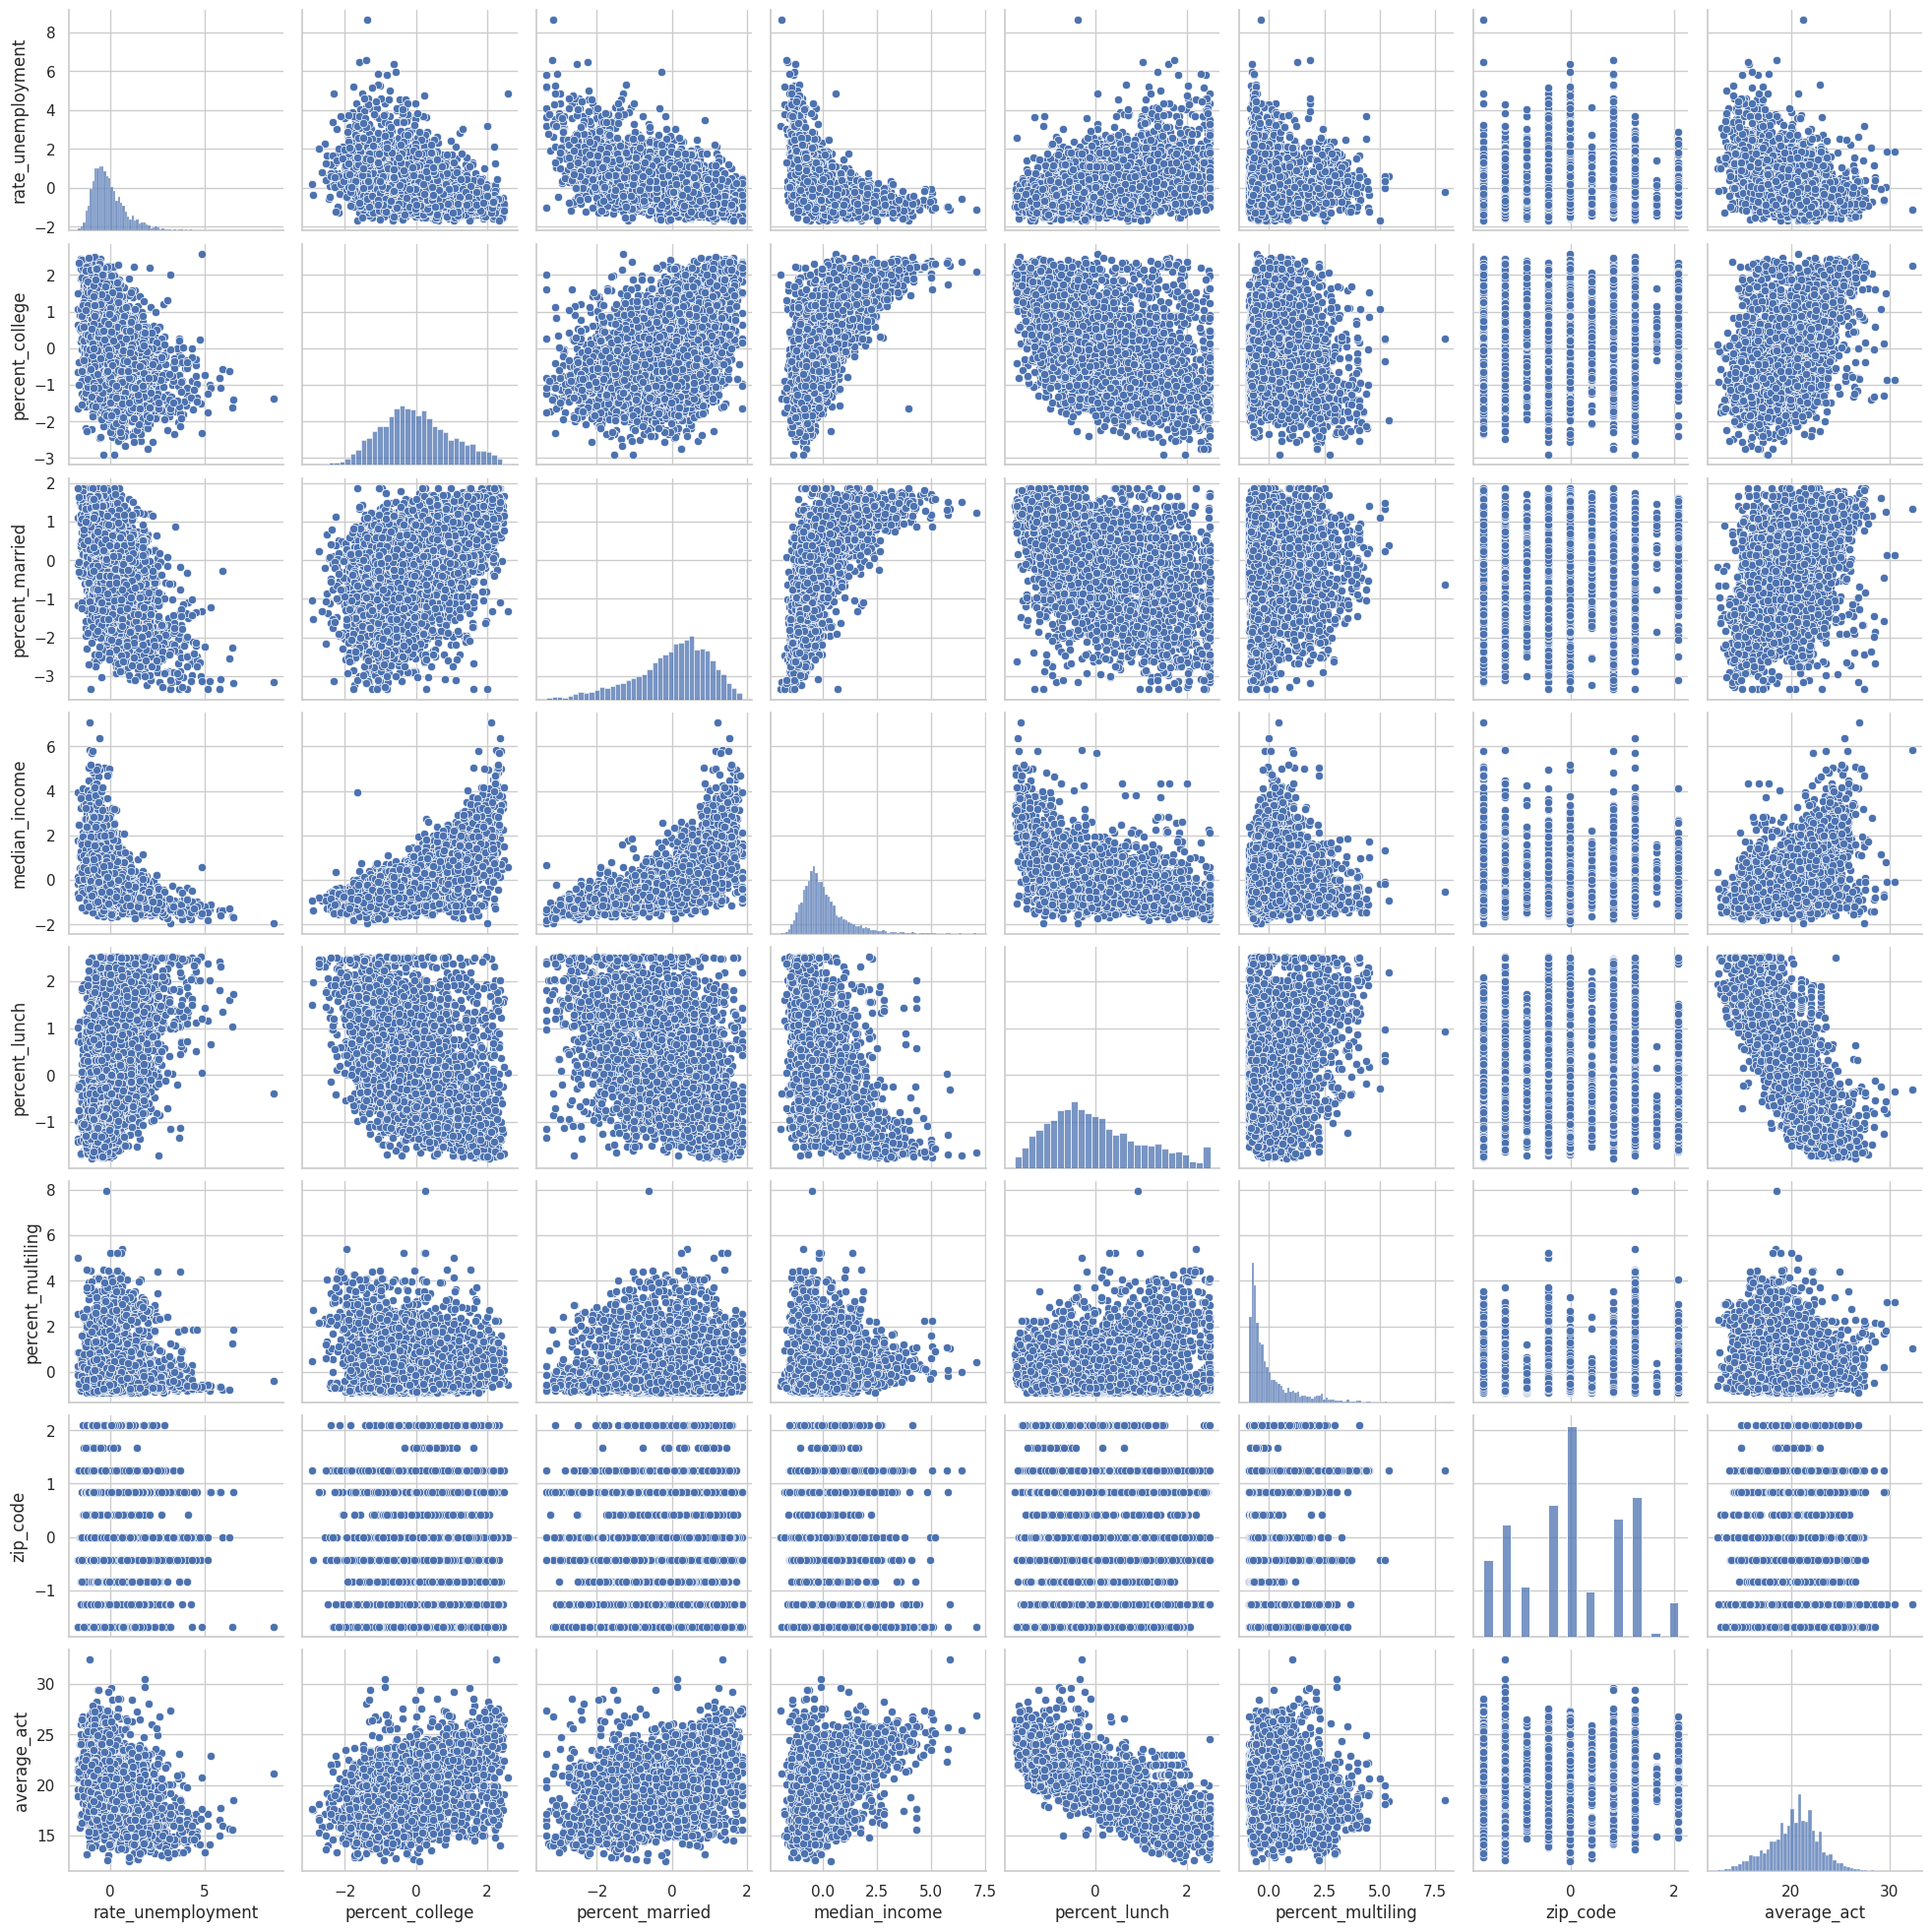

In [ ]:
fig = plt.figure()
sns.pairplot(X_train)
fig.set_size_inches(10,10)

Looking at the last row of graphs, the most striking is percent_lunch which seems to have a negative correlation between the overall number of free and reduced lunches and ACT scores. Let's take a look at a larger image.

Text(0.5, 1.0, 'ACT Scores for Free and Reduced Lunches')

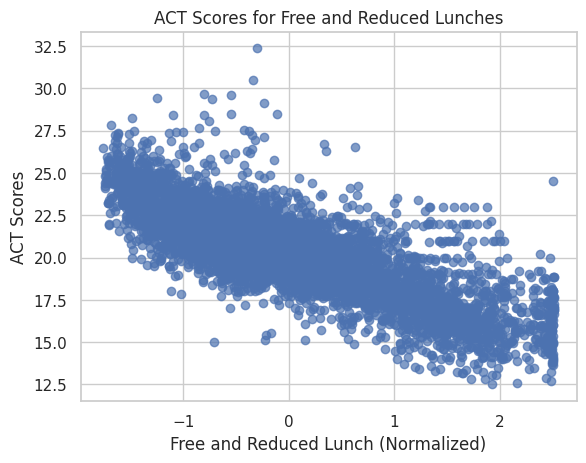

In [ ]:
fig, ax = plt.subplots()
ax.plot(X_train["percent_lunch"], X_train["average_act"], 'o', alpha = 0.7)
ax.set_xlabel("Free and Reduced Lunch (Normalized)")
ax.set_ylabel("ACT Scores")
ax.set_title("ACT Scores for Free and Reduced Lunches")

Recall that this is only for the training set, so when tested, it may not be the strongest predictor of ACT scores.

### Sweeping through all 2^7 (or 128) feature-combinations of our  to find the best fit.

Let's break up our training and testing sets into target and features as well.

In [ ]:
target = "average_act"
X_train_sweep = X_train
X_test_sweep = X_test
y_train_sweep = X_train_sweep[target]
y_test_sweep = X_test_sweep[target]

The following code puts all feature-combinations into a dictionary that shows each combination and its respective R2, and RMSE values.

In [ ]:
results_dict={}

lr = LinearRegression()
features = ["rate_unemployment", "percent_college", "percent_married", "median_income", "percent_lunch", "percent_multiling", "zip_code"]
target = ["average_act"]

# Generate all combinations of features where each feature is either included (1) or excluded (0)
feature_combos = list(itt.product([0, 1], repeat=len(features)))

# Iterate over each combination of features
for combo in feature_combos:

  # Select the features for this combination (included features)
  selected_features = [feature for feature, include in zip(features, combo) if include]

  # Ensure there are selected features before fitting the model
  if selected_features:

    lr.fit(X_train_sweep[selected_features], y_train_sweep)

    y_pred = lr.predict(X_test_sweep[selected_features])

    r2 = r2_score(y_test_sweep, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_sweep, y_pred))

    results_dict[tuple(selected_features)] = {"r2":r2, "rmse":rmse} # Stores data into the dictionary.

In [ ]:
# Let's verify the dictionary.
print(results_dict)

{('zip_code',): {'r2': -0.0009571396730010395, 'rmse': 2.4784914555999236}, ('percent_multiling',): {'r2': 0.04731454341154806, 'rmse': 2.417989735591727}, ('percent_multiling', 'zip_code'): {'r2': 0.04788610399231674, 'rmse': 2.417264294179785}, ('percent_lunch',): {'r2': 0.6415734619674288, 'rmse': 1.4831318587527325}, ('percent_lunch', 'zip_code'): {'r2': 0.6422744421569229, 'rmse': 1.4816808572900106}, ('percent_lunch', 'percent_multiling'): {'r2': 0.6435763021885841, 'rmse': 1.4789822812018407}, ('percent_lunch', 'percent_multiling', 'zip_code'): {'r2': 0.6442600721120485, 'rmse': 1.4775629464471727}, ('median_income',): {'r2': 0.19420941776795264, 'rmse': 2.2237746687047935}, ('median_income', 'zip_code'): {'r2': 0.20078147242151145, 'rmse': 2.2146875120889926}, ('median_income', 'percent_multiling'): {'r2': 0.2608622126598549, 'rmse': 2.129817484323957}, ('median_income', 'percent_multiling', 'zip_code'): {'r2': 0.2680959649167657, 'rmse': 2.119369870269893}, ('median_income', '

The following code cycles through each value of R2 and RMSE and saves the value that corresponds to the "best fit".

In [ ]:
max_r2 = 0
min_rmse = 10

for i in results_dict:
  if results_dict[i]["r2"] > max_r2:
    max_r2 = results_dict[i]["r2"]

for j in results_dict:
  if results_dict[j]["rmse"] < min_rmse:
    min_rmse = results_dict[j]["rmse"]

The following functions allow us to search the dictionary for a target value of R2 or RMSE and it will return the feature-combination associated with it.

In [ ]:
def find_keys_by_r2(results_dict, target_r2):
    matching_keys = []
    for key, metrics in results_dict.items():
        if metrics['r2'] == target_r2:
            matching_keys.append(key)
    return matching_keys

def find_keys_by_rmse(results_dict, target_rmse):
    matching_keys = []
    for key, metrics in results_dict.items():
        if metrics['rmse'] == target_rmse:
            matching_keys.append(key)
    return matching_keys

#### Let's check which feature-combinations give us the best fit for each metric.

In [ ]:
find_keys_by_r2(results_dict, max_r2)

[('rate_unemployment',
  'percent_college',
  'median_income',
  'percent_lunch',
  'percent_multiling',
  'zip_code')]

In [ ]:
find_keys_by_rmse(results_dict, min_rmse)

[('rate_unemployment',
  'percent_college',
  'median_income',
  'percent_lunch',
  'percent_multiling',
  'zip_code')]

We can see that the best R2 and RMSE values match up with features: "rate_unemployment", "percent_college", "median_income", "percent_lunch", "percent_multiling", and "zip_code", so let's focus on this combination.

### Regression

Let's get our train and test sets for both our feature-combination and our target.

In [ ]:
features = ['rate_unemployment', 'percent_college', 'median_income', 'percent_lunch', 'percent_multiling', 'zip_code']
y_train_regr = X_train[target]
y_test_regr = X_test[target]
X_train_regr = X_train[features]
X_test_regr = X_test[features]

In [ ]:
X_train_regr.head()
# Verify that the df is good.

,rate_unemployment,percent_college,median_income,percent_lunch,percent_multiling,zip_code
0,-0.736595,-0.146047,0.380549,-1.344151,0.242158,-1.681754
1,0.159068,0.878605,0.557313,0.805964,-0.588981,-0.425085
2,1.281535,-0.611498,-1.019957,1.982434,2.407552,-1.262864
3,-0.534578,0.158568,-0.008887,-0.513926,-0.804493,0.831585
4,-0.781743,1.775518,3.355178,-1.737117,0.490273,-1.681754


In [ ]:
y_train_regr.head()
# Verify that the df is good.

,average_act
0,21.788767
1,19.224664
2,18.125763
3,21.300000
4,24.865690


In [ ]:
lr.fit(X_train_regr,y_train_regr)
y_pred = lr.predict(X_test_regr)
y_pred.shape

(1420, 1)

Let's take another look at the R2 and RMSE values all together for this combination.

In [ ]:
r2 = r2_score(y_test_regr, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_regr, y_pred))

print(f"R2 score: {r2}")
print(f"Root Mean Squared Error: {rmse}")

R2 score: 0.6557596460218533
Root Mean Squared Error: 1.4534850697433204


Plot the results.

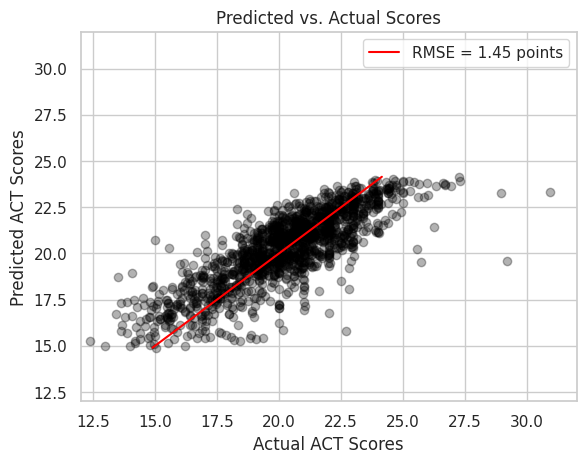

In [ ]:
one = np.linspace(y_pred.min(), y_pred.max(), 100)
rmse = np.sqrt(np.mean((y_pred - y_test_regr)**2))

fig, ax = plt.subplots(alpha = 0.7)
ax.plot(y_test_regr, y_pred, 'o', alpha = 0.3, color = "black")
ax.plot(one, one, '-', label = f"RMSE = {rmse:.2f} points", color = "red")
ax.set_xlabel("Actual ACT Scores")
ax.set_xlim([12, 32])
ax.set_ylabel("Predicted ACT Scores")
ax.set_ylim([12, 32])
ax.set_title("Predicted vs. Actual Scores")
ax.legend()

We can see that this particular combination is a good predictor for ACT scores as the points are very clearly concentrated in a one-to-one fashion as well as very near the RMSE line. While there are some that go away from the line, it is much less dense further away from the line, which is why we aren't seeing any predictions of scores over 25.

### How does each solo feature compare with each other?

In [ ]:
print(f'zip_code: {results_dict["zip_code",]}')
print()
print(f'percent_multiling: {results_dict["percent_multiling",]}')
print()
print(f'rate_unemployment: {results_dict["rate_unemployment",]}')
print()
print(f'percent_college: {results_dict["percent_college",]}')
print()
print(f'percent_married: {results_dict["percent_married",]}')
print()
print(f'median_income: {results_dict["median_income",]}')
print()
print(f'percent_lunch: {results_dict["percent_lunch",]}')

zip_code: {'r2': -0.0009571396730010395, 'rmse': 2.4784914555999236}

percent_multiling: {'r2': 0.04731454341154806, 'rmse': 2.417989735591727}

rate_unemployment: {'r2': 0.20943728320194366, 'rmse': 2.2026619505199085}

percent_college: {'r2': 0.2177904846325589, 'rmse': 2.190994223588592}

percent_married: {'r2': 0.20446705044966706, 'rmse': 2.209575120861465}

median_income: {'r2': 0.19420941776795264, 'rmse': 2.2237746687047935}

percent_lunch: {'r2': 0.6415734619674288, 'rmse': 1.4831318587527325}


Above, we can see that percent_lunch has the highest R2 value as well as the lowest RMSE value.

#### How does location and our additional step compare to the other solo "combinations"?

From the results above, we can clearly see that both "zip_code" and "percent_multiling" have the lowest two R2 value and highest two RMSE values for solo effects on average ACT scores.

R2 score: 0.04731454341154806
Root Mean Squared Error: 2.417989735591727


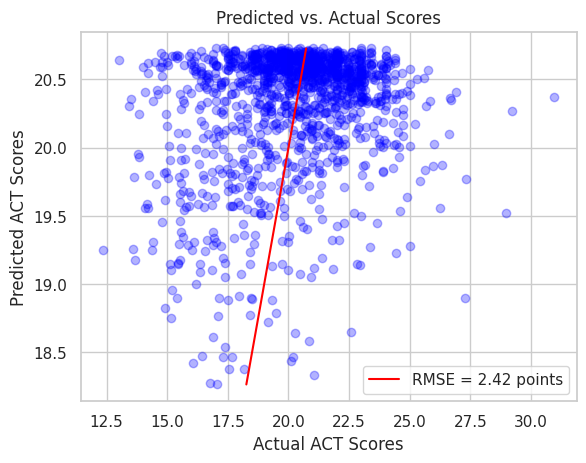

In [ ]:
features = ['percent_multiling']
y_train_regr2 = X_train[target]
y_test_regr2 = X_test[target]
X_train_regr2 = X_train[features]
X_test_regr2 = X_test[features]

lr.fit(X_train_regr2,y_train_regr2)
y_pred = lr.predict(X_test_regr2)

r2 = r2_score(y_test_regr2, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_regr2, y_pred))

print(f"R2 score: {r2}")
print(f"Root Mean Squared Error: {rmse}")

one = np.linspace(y_pred.min(), y_pred.max(), 100)
rmse = np.sqrt(np.mean((y_pred - y_test_regr2)**2))

fig, ax = plt.subplots(alpha = 0.7)
ax.plot(y_test_regr2, y_pred, 'o', alpha = 0.3, color = "blue")
ax.plot(one, one, '-', label = f"RMSE = {rmse:.2f} points", color = "red")
ax.set_xlabel("Actual ACT Scores")
ax.set_ylabel("Predicted ACT Scores")
ax.set_title("Predicted vs. Actual Scores")
ax.legend()

The graph shows quite a bit of spread above and below the RMSE line as well as having a narrow prediction range, indicating it may not be the best indicator of ACT score predictions.

R2 score: -0.0009571396730010395
Root Mean Squared Error: 2.4784914555999236


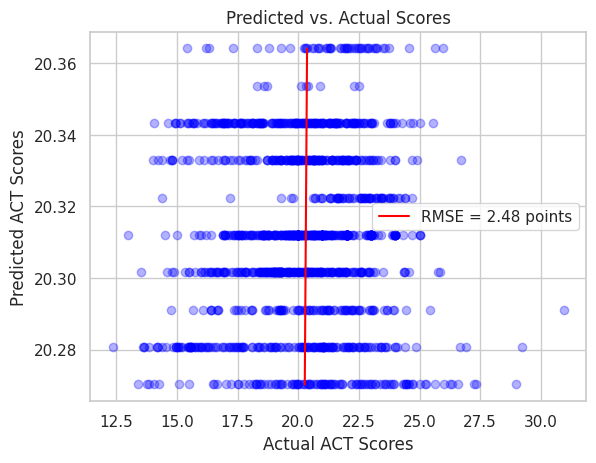

In [ ]:
features = ['zip_code']
y_train_regr3 = X_train[target]
y_test_regr3 = X_test[target]
X_train_regr3 = X_train[features]
X_test_regr3 = X_test[features]

lr.fit(X_train_regr3,y_train_regr3)
y_pred = lr.predict(X_test_regr3)

r2 = r2_score(y_test_regr3, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_regr3, y_pred))

print(f"R2 score: {r2}")
print(f"Root Mean Squared Error: {rmse}")

one = np.linspace(y_pred.min(), y_pred.max(), 100)
rmse = np.sqrt(np.mean((y_pred - y_test_regr3)**2))

fig, ax = plt.subplots(alpha = 0.7)
ax.plot(y_test_regr3, y_pred, 'o', alpha = 0.3, color = "blue")
ax.plot(one, one, '-', label = f"RMSE = {rmse:.2f} points", color = "red")
ax.set_xlabel("Actual ACT Scores")
ax.set_ylabel("Predicted ACT Scores")
ax.set_title("Predicted vs. Actual Scores")
ax.legend()

This graph doesn't say much. Its prediction range is even more narrow than multilingualism alone. Let's look at the combination of multilingualism and region first and come back to this after.

R2 score: 0.04788610399231674
Root Mean Squared Error: 2.417264294179785


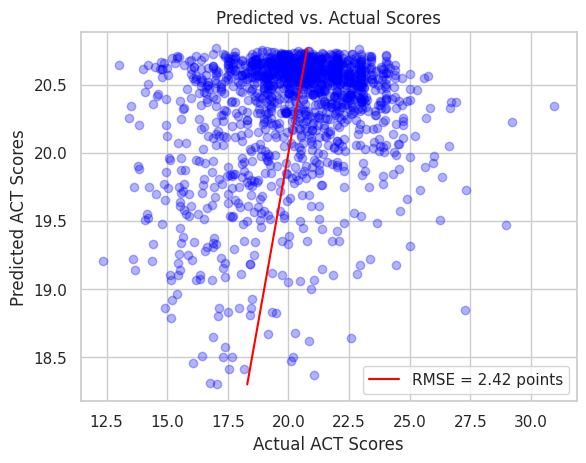

In [ ]:
features = ['percent_multiling', "zip_code"]
y_train_regr4 = X_train[target]
y_test_regr4 = X_test[target]
X_train_regr4 = X_train[features]
X_test_regr4 = X_test[features]

lr.fit(X_train_regr4,y_train_regr4)
y_pred = lr.predict(X_test_regr4)

r2 = r2_score(y_test_regr4, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_regr4, y_pred))

print(f"R2 score: {r2}")
print(f"Root Mean Squared Error: {rmse}")

one = np.linspace(y_pred.min(), y_pred.max(), 100)
rmse = np.sqrt(np.mean((y_pred - y_test_regr4)**2))

fig, ax = plt.subplots(alpha = 0.7)
ax.plot(y_test_regr4, y_pred, 'o', alpha = 0.3, color = "blue")
ax.plot(one, one, '-', label = f"RMSE = {rmse:.2f} points", color = "red")
ax.set_xlabel("Actual ACT Scores")
ax.set_ylabel("Predicted ACT Scores")
ax.set_title("Predicted vs. Actual Scores")
ax.legend()

This is very similar to the first graph of multilingualism only.

Going back to the region only feature-combination, let's take a look at the means and standard deviations for each of the ten regions just for funsies. Maybe something will stand out.

In [ ]:
X_train["zip_code"].unique()

array([-1.68175393, -0.42508462, -1.26286416,  0.83158469, -0.00619485,
        1.25047446,  2.088254  , -0.84397439,  0.41269492,  1.66936423])

In [ ]:
norm_zip_list = [-1.68175393, -0.42508462, -1.26286416,  0.83158469, -0.00619485,
                 1.25047446,  2.088254  , -0.84397439,  0.41269492,  1.66936423]
norm_zip_list.sort()
norm_zip_list

[-1.68175393,
 -1.26286416,
 -0.84397439,
 -0.42508462,
 -0.00619485,
 0.41269492,
 0.83158469,
 1.25047446,
 1.66936423,
 2.088254]

These zip first-digits are normalized but they are still maintain their order. So 0 is roughly -1.68 and 9 is roughly 2.09.

In [ ]:
X_train_r0 = X_train[X_train['zip_code'] < -1.5]
X_train_r1 = X_train[(X_train['zip_code'] > -1.5) & (X_train['zip_code'] < -1.1)]
X_train_r2 = X_train[(X_train['zip_code'] > -1.1) & (X_train['zip_code'] < -0.8)]
X_train_r3 = X_train[(X_train['zip_code'] > -0.5) & (X_train['zip_code'] < -0.1)]
X_train_r4 = X_train[(X_train['zip_code'] > -0.1) & (X_train['zip_code'] < -0)]
X_train_r5 = X_train[(X_train['zip_code'] > 0) & (X_train['zip_code'] < 0.5)]
X_train_r6 = X_train[(X_train['zip_code'] > 0.5) & (X_train['zip_code'] < 0.9)]
X_train_r7 = X_train[(X_train['zip_code'] > 0.9) & (X_train['zip_code'] < 1.3)]
X_train_r8 = X_train[(X_train['zip_code'] > 1.3) & (X_train['zip_code'] < 1.7)]
X_train_r9 = X_train[(X_train['zip_code'] > 2)]

X_test_r0 = X_test[X_test['zip_code'] < -1.5]
X_test_r1 = X_test[(X_test['zip_code'] > -1.5) & (X_test['zip_code'] < -1.1)]
X_test_r2 = X_test[(X_test['zip_code'] > -1.1) & (X_test['zip_code'] < -0.8)]
X_test_r3 = X_test[(X_test['zip_code'] > -0.5) & (X_test['zip_code'] < -0.1)]
X_test_r4 = X_test[(X_test['zip_code'] > -0.1) & (X_test['zip_code'] < -0)]
X_test_r5 = X_test[(X_test['zip_code'] > 0) & (X_test['zip_code'] < 0.5)]
X_test_r6 = X_test[(X_test['zip_code'] > 0.5) & (X_test['zip_code'] < 0.9)]
X_test_r7 = X_test[(X_test['zip_code'] > 0.9) & (X_test['zip_code'] < 1.3)]
X_test_r8 = X_test[(X_test['zip_code'] > 1.3) & (X_test['zip_code'] < 1.7)]
X_test_r9 = X_test[(X_test['zip_code'] > 2)]

#The following codes combine the train and test sets' zip-values.
r0 = pd.concat([X_train_r0, X_test_r0], ignore_index=True)
r1 = pd.concat([X_train_r1, X_test_r1], ignore_index=True)
r2 = pd.concat([X_train_r2, X_test_r2], ignore_index=True)
r3 = pd.concat([X_train_r3, X_test_r3], ignore_index=True)
r4 = pd.concat([X_train_r4, X_test_r4], ignore_index=True)
r5 = pd.concat([X_train_r5, X_test_r5], ignore_index=True)
r6 = pd.concat([X_train_r6, X_test_r6], ignore_index=True)
r7 = pd.concat([X_train_r7, X_test_r7], ignore_index=True)
r8 = pd.concat([X_train_r8, X_test_r8], ignore_index=True)
r9 = pd.concat([X_train_r9, X_test_r9], ignore_index=True)

In [ ]:
print(len(r0), len(r1), len(r2), len(r3), len(r4), len(r5), len(r6), len(r7), len(r8), len(r9))

587 856 397 1031 1622 348 896 1067 34 262


This shows the number of samples from each zip region. Zip codes starting with 8 only have 34 entries.

In [ ]:
r0_mean = r0["average_act"].mean()
r0_std = r0["average_act"].std()
print(r0_mean, r0_std)

r1_mean = r1["average_act"].mean()
r1_std = r1["average_act"].std()
print(r1_mean, r1_std)

r2_mean = r2["average_act"].mean()
r2_std = r2["average_act"].std()
print(r2_mean, r2_std)

r3_mean = r3["average_act"].mean()
r3_std = r3["average_act"].std()
print(r3_mean, r3_std)

r4_mean = r4["average_act"].mean()
r4_std = r4["average_act"].std()
print(r4_mean, r4_std)

r5_mean = r5["average_act"].mean()
r5_std = r5["average_act"].std()
print(r5_mean, r5_std)

r6_mean = r6["average_act"].mean()
r6_std = r6["average_act"].std()
print(r6_mean, r6_std)

r7_mean = r7["average_act"].mean()
r7_std = r7["average_act"].std()
print(r7_mean, r7_std)

r8_mean = r8["average_act"].mean()
r8_std = r8["average_act"].std()
print(r8_mean, r8_std)

r9_mean = r9["average_act"].mean()
r9_std = r9["average_act"].std()
print(r9_mean, r9_std)

21.295831747279784 3.0265368495174094
19.645233530747554 3.0474040195738756
20.39731748799759 2.180030569670316
19.713073713655675 2.317942095010852
20.359386126957027 2.1521078191549123
22.002586206896552 2.116184152475092
20.155245535714283 2.345797465618189
19.979490498047205 2.3577729091527493
20.088235294117645 1.5205191908113715
21.389657840039522 2.215119638371175


Nothing is jumping out here. They all look similar enough to me. Again, this is not the greatest way to determine it. If I could redo this assignment, I would try to do a tree-based method to further explore the geographic regions.

## Conclusion

As stated in the introduction, a range of school performance on ACT exams is expected, but after analyzing various factors, it's clear that some stand out more than others. My primary focus in this analysis, in addition to answering the main question, was finding which socioeconomic feature has the most accurate predicting power on ACT scores as well as determining how accurate both the features of multilingual regions and zip regions are at predicting ACT scores. This analysis was completed using a standard linear regression.

After sweeping through each possible combinations of features, it was shown that the best predictor of ACT scores was a combination of unemployment rate, precent of adults with college degrees, median household income, percent of free and reduced lunch, percent of multilingual people, and general region (split into 10 regions based off the first digit of the zip code).

Individually, percent of free and reduced lunch was the strongest solo predictor with the highest R2 value and lowest RMSE value. On the other hand, despite being included in the best combination, the general region and the percent of multilingual people had some of the weakest solo predicting power with the two lowest R2 values and highest RMSE values.

The general regions were further explored with a simple mean and standard deviation to see if there were any glaring differences between the regions, but further analysis would need to be conducted to find a definite conclusion.

Lastly, to answer the question: "is school performance predicted by socioeconomic factors?" Clearly YES!